# Rishik Reddy Bandi
# 220968300

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('bands.data', names = [
'timestamp', 'cylinder_number', 'customer', 'job_number',
'grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg', 'cyl_division',
'paper_type', 'ink_type', 'direct_steam', 'solvent_type', 'type_on_cyl', 
'press_type', 'press', 'unit_number', 'cyl_size', 'paper_mill_location', 
'plating_tank', 'proof_cut', 'viscosity', 'caliper', 'ink_temp', 'humidity', 
'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct',
'solvent_pct', 'esa_voltage', 'esa_amperage', 'wax', 'hardener', 
'roller_durometer', 'cuurent_density', 'anode_space_ratio', 'chrome_content', 
'band_type'
])
df

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cyl_division,paper_type,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,cuurent_density,anode_space_ratio,chrome_content,band_type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
537,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
538,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
539,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


In [5]:
df.isnull().sum()

timestamp              0
cylinder_number        0
customer               0
job_number             0
grain_screened         0
ink_color              0
proof_on_ctd_ink       0
blade_mfg              0
cyl_division           0
paper_type             0
ink_type               0
direct_steam           0
solvent_type           0
type_on_cyl            0
press_type             0
press                  0
unit_number            0
cyl_size               1
paper_mill_location    1
plating_tank           1
proof_cut              1
viscosity              1
caliper                1
ink_temp               2
humidity               2
roughness              2
blade_pressure         2
varnish_pct            2
press_speed            2
ink_pct                2
solvent_pct            2
esa_voltage            2
esa_amperage           2
wax                    2
hardener               2
roller_durometer       2
cuurent_density        2
anode_space_ratio      2
chrome_content         2
band_type              2


In [6]:
df = df.drop(columns=["timestamp", "cylinder_number", "customer", "job_number"])
df

,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cyl_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cyl,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,cuurent_density,anode_space_ratio,chrome_content,band_type
0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,36.4,0,0,2.5,1,34,40,105,100,band
1,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,?,key,?,?,gallatin,super,uncoated,?,?,?,...,?,?,?,1,1,?,40,112.5,100,band
537,?,key,?,?,gallatin,super,coated,?,?,yes,...,?,?,?,0,0,?,40,110,100,band
538,?,key,?,?,gallatin,super,coated,?,?,?,...,?,?,?,2.7,2.8,?,40,108,100,band
539,?,key,?,?,gallatin,super,uncoated,?,?,?,...,?,?,?,1.5,2.3,?,40,108,100,band


In [7]:
df.dropna()

,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cyl_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cyl,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,cuurent_density,anode_space_ratio,chrome_content,band_type
0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,36.4,0,0,2.5,1,34,40,105,100,band
1,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,?,key,?,?,gallatin,super,uncoated,?,?,?,...,?,?,?,1,1,?,40,112.5,100,band
537,?,key,?,?,gallatin,super,coated,?,?,yes,...,?,?,?,0,0,?,40,110,100,band
538,?,key,?,?,gallatin,super,coated,?,?,?,...,?,?,?,2.7,2.8,?,40,108,100,band
539,?,key,?,?,gallatin,super,uncoated,?,?,?,...,?,?,?,1.5,2.3,?,40,108,100,band


In [8]:
for col in df.columns:
    df=df[df[col]!='?']
df

,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cyl_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cyl,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,cuurent_density,anode_space_ratio,chrome_content,band_type
0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,36.4,0,0,2.5,1,34,40,105,100,band
3,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
5,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
6,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,...,37.5,6,0,2.5,0.6,30,40,106.67,100,noband
7,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,...,37.5,6,0,2.5,1.1,30,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,...,41.2,8,0,3,1,33,40,106.45,100,noband
426,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,...,37.5,1,0,2.5,1.5,30,40,106.45,100,noband
427,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,...,39.5,4.5,0,1.9,1.3,30,40,114.28,100,noband
428,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,...,36.1,4,0,3,1,40,40,117.85,100,noband


In [10]:
df["unit_number"]=df["unit_number"].astype(str)
for col in df.columns:
    df[col]=df[col].apply(lambda x: x.lower())
df

,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cyl_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cyl,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,cuurent_density,anode_space_ratio,chrome_content,band_type
0,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,...,36.4,0,0,2.5,1,34,40,105,100,band
3,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
5,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
6,no,key,yes,benton,gallatin,coated,coated,no,line,yes,...,37.5,6,0,2.5,0.6,30,40,106.67,100,noband
7,no,key,yes,benton,gallatin,coated,coated,no,line,yes,...,37.5,6,0,2.5,1.1,30,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,no,key,yes,benton,gallatin,coated,coated,no,line,yes,...,41.2,8,0,3,1,33,40,106.45,100,noband
426,no,key,yes,benton,gallatin,coated,coated,no,line,yes,...,37.5,1,0,2.5,1.5,30,40,106.45,100,noband
427,no,key,yes,benton,gallatin,coated,coated,no,line,yes,...,39.5,4.5,0,1.9,1.3,30,40,114.28,100,noband
428,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,...,36.1,4,0,3,1,40,40,117.85,100,noband


In [12]:
def label(df):
    le=LabelEncoder()
    for column in df.columns:
        df[column]=le.fit_transform(df[column])
    return df
df=label(df)
df

,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cyl_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cyl,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,cuurent_density,anode_space_ratio,chrome_content,band_type
0,1,0,1,0,0,1,2,0,0,1,...,37,0,0,18,11,4,4,10,0,0
3,1,0,1,0,0,1,2,0,0,1,...,55,0,0,18,16,7,4,21,0,1
5,1,0,1,0,0,1,2,0,0,1,...,47,12,0,18,8,7,4,9,0,1
6,0,0,1,0,0,0,0,0,0,1,...,46,13,0,18,5,1,4,17,0,1
7,0,0,1,0,0,0,0,0,0,1,...,46,13,0,18,13,1,4,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0,0,1,0,0,0,0,0,0,1,...,74,14,0,25,11,3,4,14,0,1
426,0,0,1,0,0,0,0,0,0,1,...,46,3,0,18,19,1,4,14,0,1
427,0,0,1,0,0,0,0,0,0,1,...,62,11,0,10,16,1,4,27,0,1
428,1,0,1,0,0,1,2,0,0,1,...,34,10,0,25,11,7,4,30,0,1


In [13]:
x=df.iloc[:,:-1]
x

,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cyl_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cyl,...,ink_pct,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,cuurent_density,anode_space_ratio,chrome_content
0,1,0,1,0,0,1,2,0,0,1,...,22,37,0,0,18,11,4,4,10,0
3,1,0,1,0,0,1,2,0,0,1,...,37,55,0,0,18,16,7,4,21,0
5,1,0,1,0,0,1,2,0,0,1,...,31,47,12,0,18,8,7,4,9,0
6,0,0,1,0,0,0,0,0,0,1,...,58,46,13,0,18,5,1,4,17,0
7,0,0,1,0,0,0,0,0,0,1,...,58,46,13,0,18,13,1,4,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0,0,1,0,0,0,0,0,0,1,...,48,74,14,0,25,11,3,4,14,0
426,0,0,1,0,0,0,0,0,0,1,...,58,46,3,0,18,19,1,4,14,0
427,0,0,1,0,0,0,0,0,0,1,...,45,62,11,0,10,16,1,4,27,0
428,1,0,1,0,0,1,2,0,0,1,...,54,34,10,0,25,11,7,4,30,0


In [14]:
y=df.iloc[:,-1]
y

0      0
3      1
5      1
6      1
7      1
      ..
424    1
426    1
427    1
428    1
429    0
Name: band_type, Length: 277, dtype: int32

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [19]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [23]:
accuracy_score(y_test, y_pred)

0.75

<Axes: >

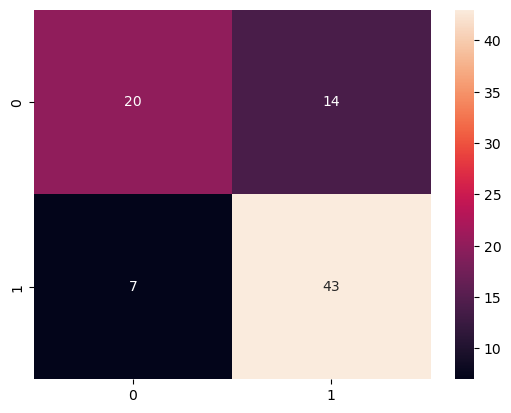

In [25]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [26]:
estimator = model.estimators_[0]

In [28]:
feature_names=x.columns
fnl = feature_names.tolist()
class_names=df["band_type"]
cnl = class_names.tolist()

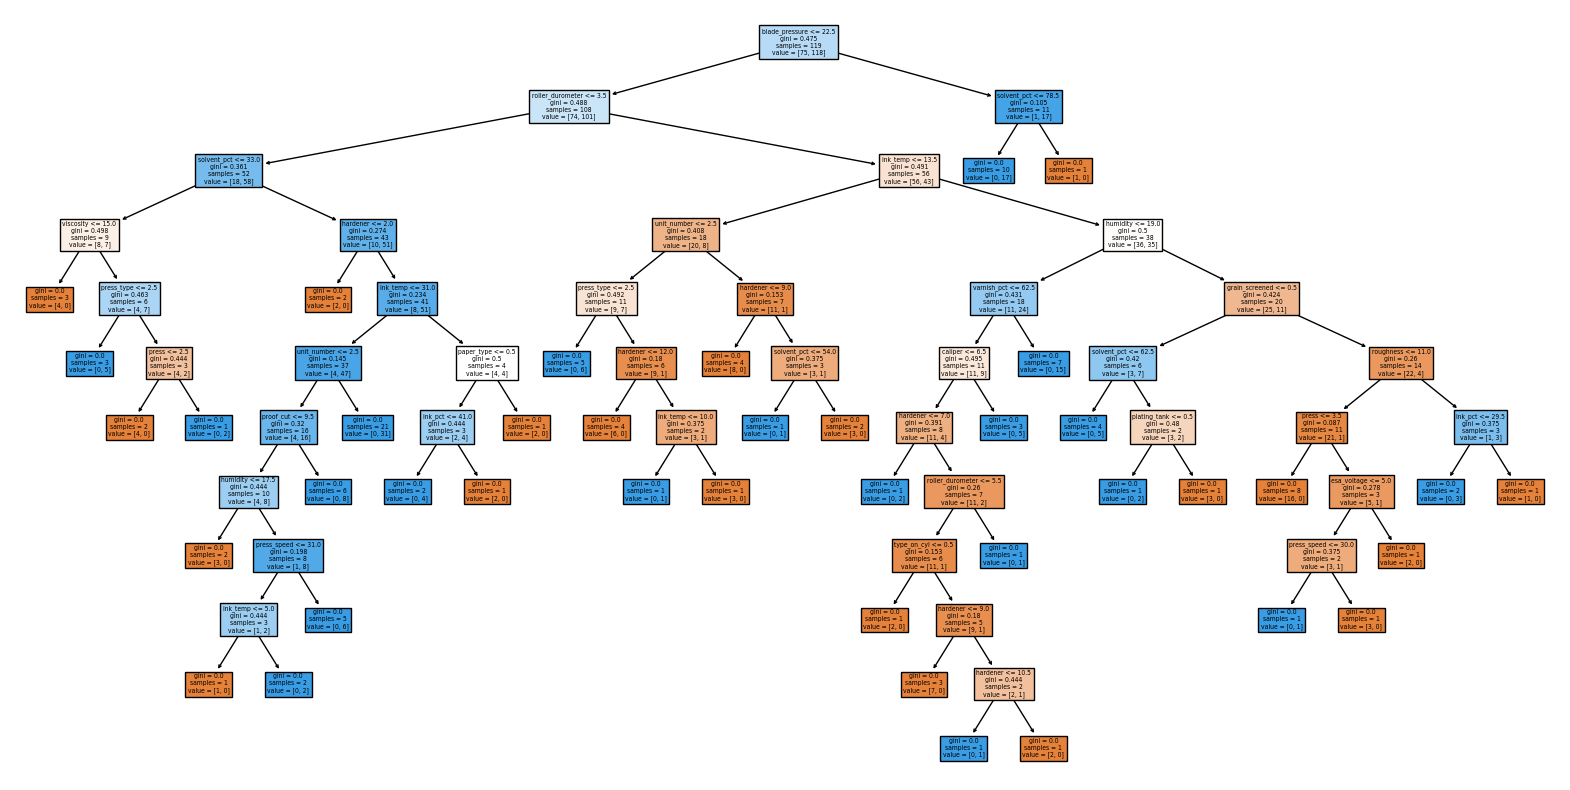

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(estimator,feature_names=fnl,filled=True, )
plt.show()